<a href="https://colab.research.google.com/github/ommishra0707/Airbnb-Booking-analysis/blob/main/Team_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Import package
import pandas as pd
import numpy as np
import ast
from datetime import datetime
from datetime import date
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading csv File
file_path = '/content/drive/MyDrive/Copy of Airbnb NYC 2019.csv'
airbnb_df = pd.read_csv(file_path, index_col = False)

In [ ]:
# printing shape
print("Shape of the Dataset:", airbnb_df.shape)

Shape of the Dataset: (48895, 16)


In [ ]:
# Using head function to get first 5 rows
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# using tail with a transpose to get the view of columns
airbnb_df.tail().T

,48890,48891,48892,48893,48894
id,36484665,36485057,36485431,36485609,36487245
name,Charming one bedroom - newly renovated rowhouse,Affordable room in Bushwick/East Williamsburg,Sunny Studio at Historical Neighborhood,43rd St. Time Square-cozy single bed,Trendy duplex in the very heart of Hell's Kitchen
host_id,8232441,6570630,23492952,30985759,68119814
host_name,Sabrina,Marisol,Ilgar & Aysel,Taz,Christophe
neighbourhood_group,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan
neighbourhood,Bedford-Stuyvesant,Bushwick,Harlem,Hell's Kitchen,Hell's Kitchen
latitude,40.67853,40.70184,40.81475,40.75751,40.76404
longitude,-73.94995,-73.93317,-73.94867,-73.99112,-73.98933
room_type,Private room,Private room,Entire home/apt,Shared room,Private room
price,70,40,115,55,90


In [ ]:
# To get the descriptive summary of dataset
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# studying the missing values of columns
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here we see reviews_per_month and calculated_host_listings_count columns have  around ten thousand null values

In [ ]:
# Handling the null values
airbnb_df['reviews_per_month'].fillna(0., inplace = True)
airbnb_df.fillna('Not_mapped', inplace = True)

In [ ]:
# Now checking if any null values are present in our dataset
count_of_null_values = np.sum(airbnb_df.isnull())
count_of_null_values

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# number of unique airbnb  
airbnb_df['name'].nunique()

47906

In [ ]:
# checking for duplicate values
airbnb_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

so there is no Duplicate Rows in a Dataframe

In [ ]:
# number of unique neighbourhood group
airbnb_df['neighbourhood_group'].nunique()

5

In [ ]:
# pairwise correlation of all columns in the dataframe
corr_df = airbnb_df.corr()
corr_df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


In [ ]:
# setting the size of the graphs and also style of seaborn
style.use('seaborn-poster')
style.use('ggplot')
sns.set(style = 'darkgrid')

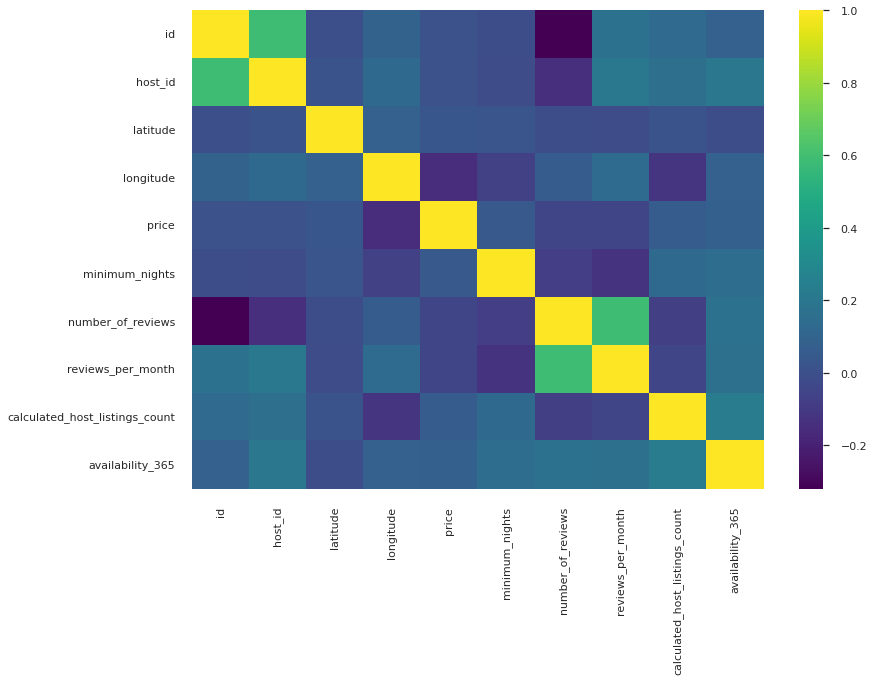

In [ ]:
# plotting the correlation Graph
sns.heatmap(corr_df,cmap='viridis')

The review_per_month and number_of_review has a good correlation.

but from the pearson correlation we got to know that there are not many strong correlations.
 

### Airbnb listings in different neighbourhoods

In [ ]:
# number of unique neighbourhood
airbnb_df.neighbourhood.nunique()

221

In [ ]:
# top number of airbnb listings in different neighbourhood
top_neighbourhood = airbnb_df['neighbourhood'].value_counts().reset_index()
top_neighbourhood.head(20)

,index,neighbourhood
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545




*  Williamsburg has the highest no. of listings which is about 3920.

*  Even the Bedford-Stuyvesant has good no. of listings near to 3714.



### Airbnb listings in different neighbourhood groups

In [ ]:
# number of airbnb in different neighbourhood group
diff = airbnb_df[['neighbourhood_group','id']]
count_of_neighbourhood_group = diff.groupby(['neighbourhood_group'], as_index = False).count().rename(columns={'id':'count'})
print(count_of_neighbourhood_group)

  neighbourhood_group  count
0               Bronx   1091
1            Brooklyn  20104
2           Manhattan  21661
3              Queens   5666
4       Staten Island    373


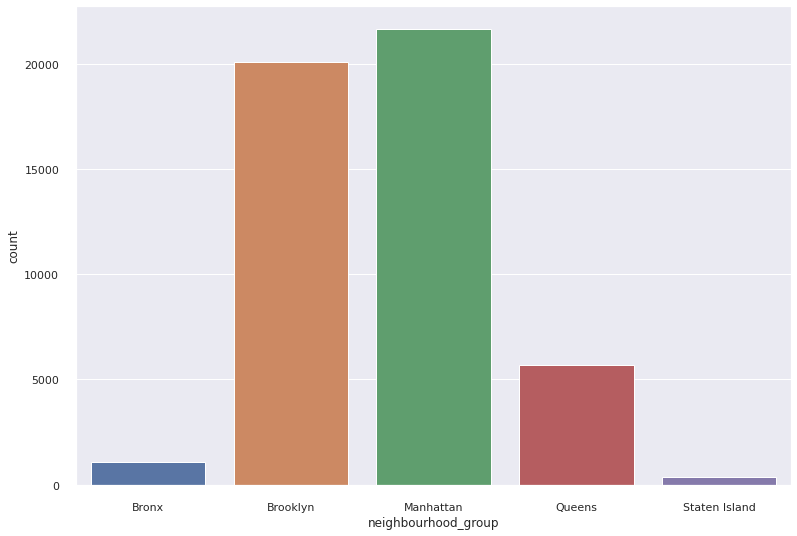

In [ ]:
# Plotting Graph 
sns.barplot(x = 'neighbourhood_group',
            y = 'count',
            data = count_of_neighbourhood_group)
# Show the plot
plt.show()




1.   Manhattan has most no. of airbnb listing
2.   Staten island has least no. of airbnb listing







### Coordinates of various rooms in different neighbourhood groups

Text(0.5, 1.0, 'Distribution of various neighbourhood groups')

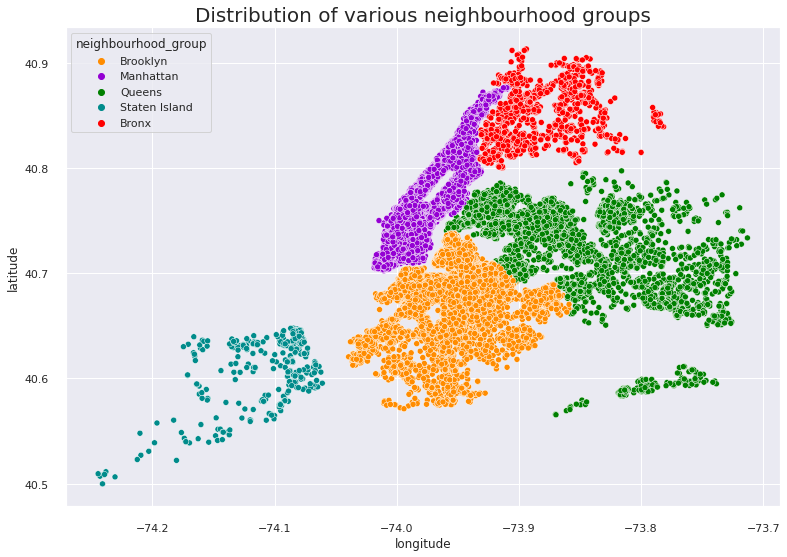

In [ ]:
# plotting latitude and longitude of rooms for different neighbourhood groups
sns.scatterplot(
    x = airbnb_df['longitude'], 
    y = airbnb_df['latitude'],
    hue = airbnb_df['neighbourhood_group'],
    palette = ['darkorange', 'darkviolet', 'green', 'darkcyan', 'red']
)
plt.title('Distribution of various neighbourhood groups', fontsize = 20)

Inference: From the above graph, we observe that Staten Island has the least number of rooms.

### Distribution of Room types





In [ ]:
# total count of listings for each category of room
dff = airbnb_df.groupby(['room_type'],as_index = False).agg({'calculated_host_listings_count':'count'}).rename(columns={'calculated_host_listings_count':'count'})
dff

,room_type,count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160




1.   There are more than 25k Entire room/apt
2.   Privates rooms are around 22k





Text(0.5, 0, 'Room_type')

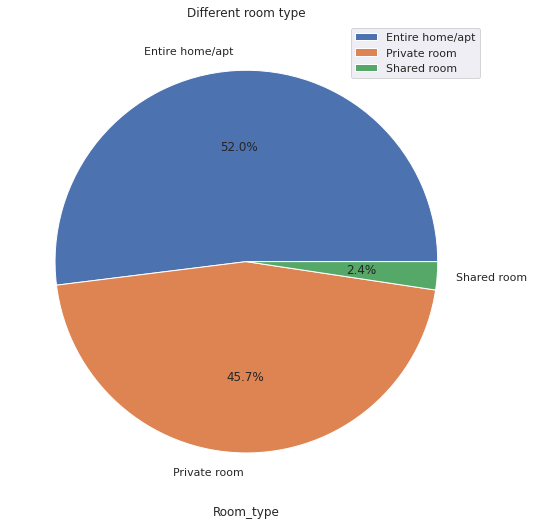

In [ ]:
dff.plot.pie(y='count',labels = dff['room_type'],autopct="%.1f%%");
plt.title('Different room type')
plt.ylabel('')
plt.xlabel('Room_type')



*   Shared room has the minimum number of listings (2.4%) among all others room types.  

*   Entire Home/apt has the maximum number of listings which is approx. 52%.

*   Private room has decent no. of listing (45.7%).
   





### Coordinates of various rooms for different room types

Text(0.5, 1.0, 'Distribution of various Room types')

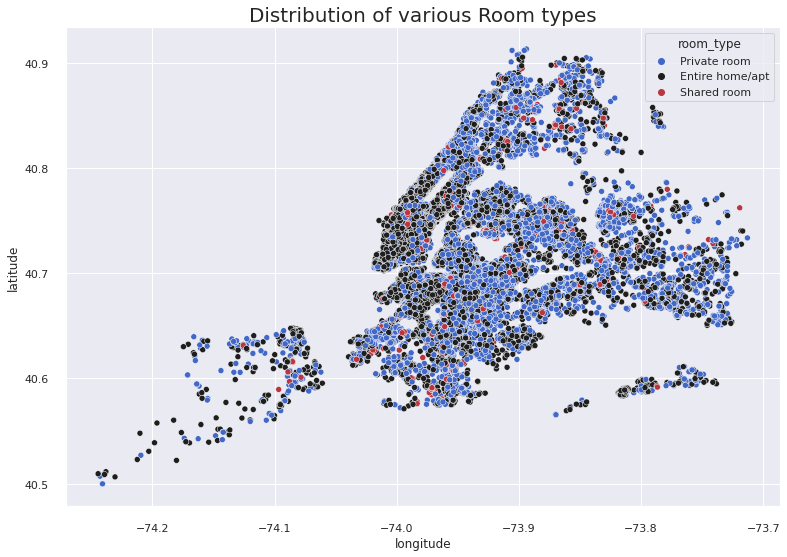

In [ ]:
# plotting latitude and longitude of rooms for different room types
sns.scatterplot(
    x = airbnb_df['longitude'],
    y = airbnb_df['latitude'],
    hue = airbnb_df['room_type'],
    palette = ('icefire')
)
plt.title('Distribution of various Room types', fontsize = 20)

Inference: From the above graph, we can deduce shared rooms are the least in number.

## What can we learn about different hosts and areas?

In [ ]:
# grouping neighbourhood_group according to the average minimum nights
preferred_neighbourhood_group = airbnb_df.groupby(['neighbourhood_group'], as_index = False).agg({'minimum_nights': 'mean'}).rename(columns = {'minimum_nights' : 'avg_nights_stayed_by_hosts'})
preferred_neighbourhood_group

,neighbourhood_group,avg_nights_stayed_by_hosts
0,Bronx,4.560953
1,Brooklyn,6.056556
2,Manhattan,8.579151
3,Queens,5.181433
4,Staten Island,4.831099


Text(0, 0.5, 'Neighbourhood Group')

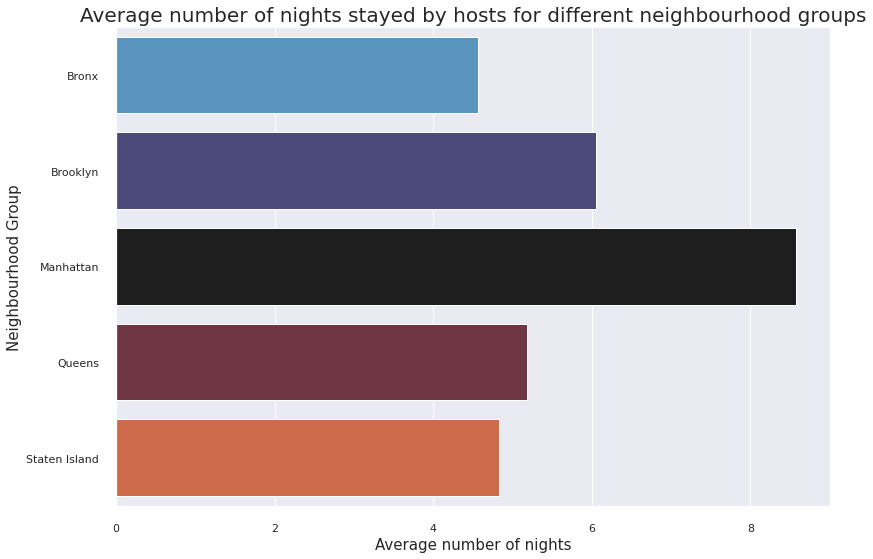

In [ ]:
sns.barplot(
    y = 'neighbourhood_group',
    x = 'avg_nights_stayed_by_hosts',
    data = preferred_neighbourhood_group,
    palette = ('icefire'),
    orient = 'horizontal'
)
plt.title('Average number of nights stayed by hosts for different neighbourhood groups', fontsize = 20)
plt.xlabel('Average number of nights', fontsize = 15)
plt.ylabel('Neighbourhood Group', fontsize = 15)

Inference: <br>
The graph shows that people stayed more nights (an average of 8-9 nights) in Manhattan in comparison to other places.

### Minimum number of nights people live in different room types

In [ ]:
# grouping room_types according to the average minimum nights
preferred_room_types = airbnb_df.groupby(['room_type'], as_index = False).agg({'minimum_nights': 'mean'}).rename(columns = {'minimum_nights' : 'avg_nights_stayed_by_hosts'})
preferred_room_types

,room_type,avg_nights_stayed_by_hosts
0,Entire home/apt,8.506907
1,Private room,5.377900
2,Shared room,6.475000


Text(0, 0.5, 'Average number of nights')

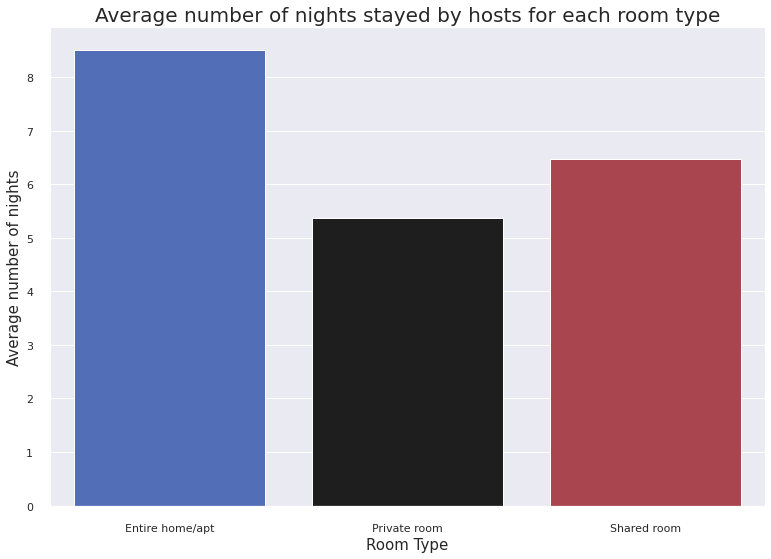

In [ ]:
sns.barplot(
    x = 'room_type',
    y = 'avg_nights_stayed_by_hosts',
    data = preferred_room_types,
    palette = ('icefire')
)
plt.title('Average number of nights stayed by hosts for each room type', fontsize = 20)
plt.xlabel('Room Type', fontsize = 15)
plt.ylabel('Average number of nights', fontsize = 15)

Inference: <br>
The above graph states that hosts typically prefer to stay longer in an entire home/apartment (around 8-9 nights) followed by shared rooms.
<br>

## What can we learn from predictions?

### Availability of room types for different neighbourhood groups

In [ ]:
# grouping neighbourhood_group according to the mean of availability_365
available_neighbourhood_grps = airbnb_df.groupby(['neighbourhood_group', 'room_type'], as_index = False).agg({'availability_365': 'mean'}).rename(columns = {'availability_365' : 'availability_of_rooms'})
available_neighbourhood_grps

,neighbourhood_group,room_type,availability_of_rooms
0,Bronx,Entire home/apt,158.000000
1,Bronx,Private room,171.331288
2,Bronx,Shared room,154.216667
3,Brooklyn,Entire home/apt,97.205147
4,Brooklyn,Private room,99.917983
5,Brooklyn,Shared room,178.007264
6,Manhattan,Entire home/apt,117.140996
7,Manhattan,Private room,101.845026
8,Manhattan,Shared room,138.572917
9,Queens,Entire home/apt,132.267176


Text(0, 0.5, 'Availability of Rooms')

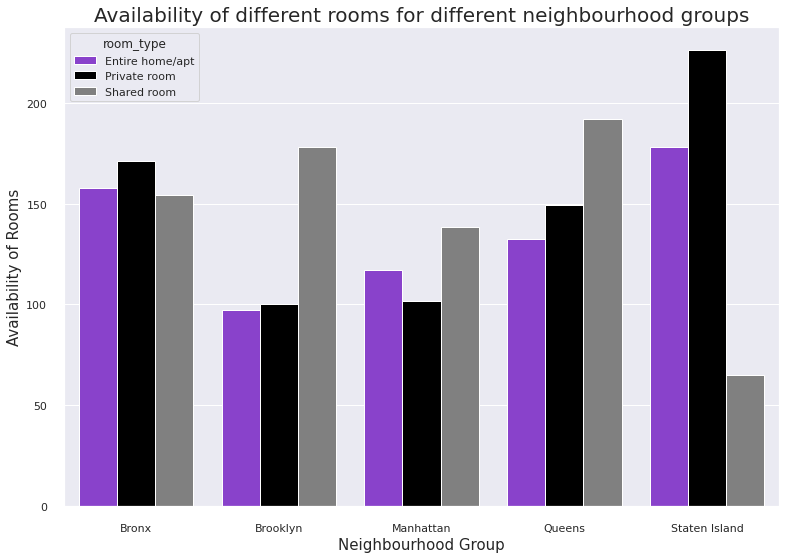

In [ ]:
# setting seaborn plotting aesthetics for creating a grouped bar chart
sns.barplot(
    x = 'neighbourhood_group',
    y = 'availability_of_rooms',
    hue = 'room_type',
    data = available_neighbourhood_grps,
    palette = ['blueviolet', 'black', 'grey']
)
plt.title('Availability of different rooms for different neighbourhood groups', fontsize = 20)
plt.xlabel('Neighbourhood Group', fontsize = 15)
plt.ylabel('Availability of Rooms', fontsize = 15)

Inference:

* The chart clearly states that for Staten Island the availability of private rooms and entire home/apt is quite high in comparison to other places.
* For Brooklyn, the availability of rooms is opposite to that of Staten Island. Here shared rooms are more available.
* For Bronx and Manhatten the availability for all room types is roughly the same.

## Count of last reviews per year

In [ ]:
# Fetching the year from last_review by first converting it into a DateTime object
airbnb_year_df = airbnb_df[airbnb_df['last_review'] != 'Not_mapped'].copy()
airbnb_year_df['year_of_last_review'] = airbnb_year_df.apply(lambda row: datetime.strptime(row['last_review'], '%Y-%m-%d').year, axis = 1)
airbnb_year_df.loc[:, ('last_review', 'year_of_last_review')].head()

,last_review,year_of_last_review
0,2018-10-19,2018
1,2019-05-21,2019
3,2019-07-05,2019
4,2018-11-19,2018
5,2019-06-22,2019


In [ ]:
last_year_counts = airbnb_year_df.value_counts('year_of_last_review')
last_year_counts

year_of_last_review
2019    25209
2018     6050
2017     3205
2016     2707
2015     1393
2014      199
2013       48
2012       25
2011        7
dtype: int64

Text(0.5, 0, 'Year')

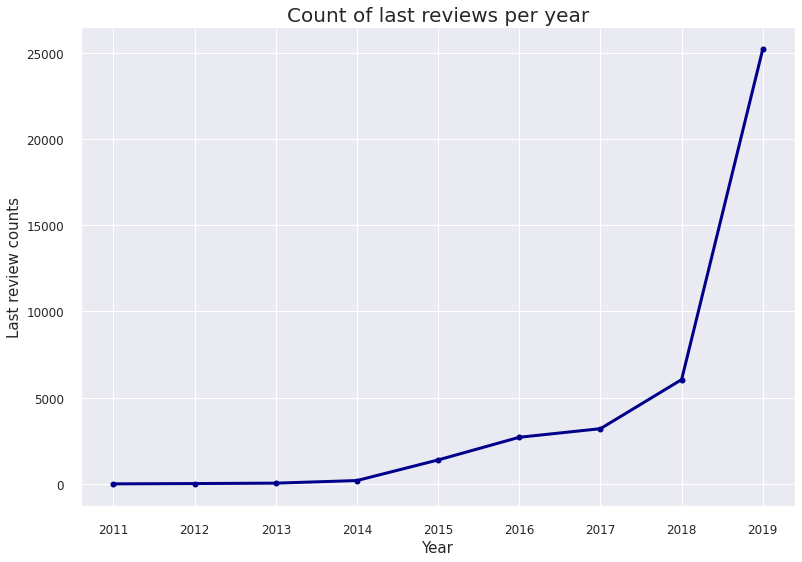

In [ ]:
# plotting number of last reviews year-wise
graph = last_year_counts.plot.line(
    linewidth = 3,
    marker = 'o',
    color = 'darkblue',
    linestyle = 'solid',
    fontsize = 12
)
graph.set_title('Count of last reviews per year', fontsize = 20)
graph.set_ylabel('Last review counts', fontsize = 15)
graph.set_xlabel('Year', fontsize = 15)

Inference: <br>
The above graph concludes that the majority of the people (around 25,000) last reviewed in the year 2019 while close to 6,000 people last reviewed in 2018.

### What will be the Average price of airbnb with respect to different neighbourhood group  ?


In [ ]:
#average price of all airbnb
airbnb_df['price'].agg({'price':'mean'}).reset_index()

,index,price
0,price,152.720687


In [ ]:
# Avg price in different neighbourhood group 
avg = airbnb_df.groupby(['neighbourhood_group']).mean('price').rename(columns={'price':'avg_price'}).reset_index()
avg

,neighbourhood_group,id,host_id,latitude,longitude,avg_price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Bronx,2.273492e+07,1.056099e+08,40.848305,-73.884552,87.496792,4.560953,26.004583,1.475655,2.233731,165.758937
1,Brooklyn,1.825685e+07,5.671526e+07,40.685036,-73.951190,124.383207,6.056556,24.202845,1.049790,2.284371,100.232292
2,Manhattan,1.877494e+07,6.783062e+07,40.765062,-73.974607,196.875814,8.579151,20.985596,0.976782,12.791330,111.979410
3,Queens,2.175500e+07,9.615680e+07,40.731531,-73.872775,99.517649,5.181433,27.700318,1.567076,4.060184,144.451818
4,Staten Island,2.159747e+07,9.853360e+07,40.610225,-74.105805,114.812332,4.831099,30.941019,1.576381,2.319035,199.678284


In [ ]:
airbnb_df[['neighbourhood_group','price']]

,neighbourhood_group,price
0,Brooklyn,149
1,Manhattan,225
2,Manhattan,150
3,Brooklyn,89
4,Manhattan,80
...,...,...
48890,Brooklyn,70
48891,Brooklyn,40
48892,Manhattan,115
48893,Manhattan,55


In [ ]:
#Avg price in different Neighbourhood Group
avg_price = airbnb_df[['neighbourhood_group','price']]
avg = avg_price.groupby(['neighbourhood_group']).agg({'price':'mean'}).rename(columns = {'price':'avgprice'}).reset_index()
avg

,neighbourhood_group,avgprice
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


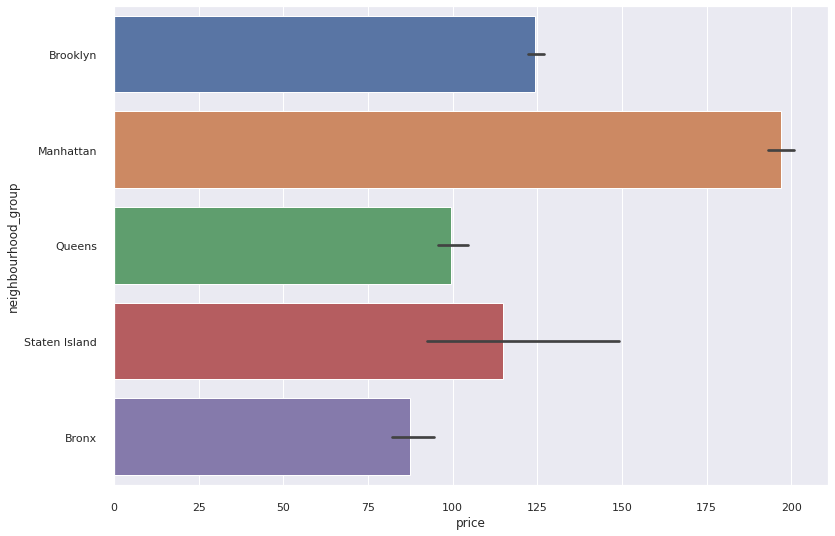

In [ ]:
# plotting graph 
sns.barplot(y = 'neighbourhood_group',
            x = 'price',
            data = avg_price,
            orient = 'h')
# Show the plot
plt.show()



*  Manhanttan has the highest average price among all areas.
*  Brooklyn has the second highest average price.
*  Bronx has the lowest average price among all areas.



### What will be the average price according to the type of room and for different neighbourhood group?

In [ ]:
# average price based on type of room
ap = airbnb_df.groupby(['room_type']).agg({'price':'mean'}).rename(columns={'price':'avg_price'}).reset_index()
ap

,room_type,avg_price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


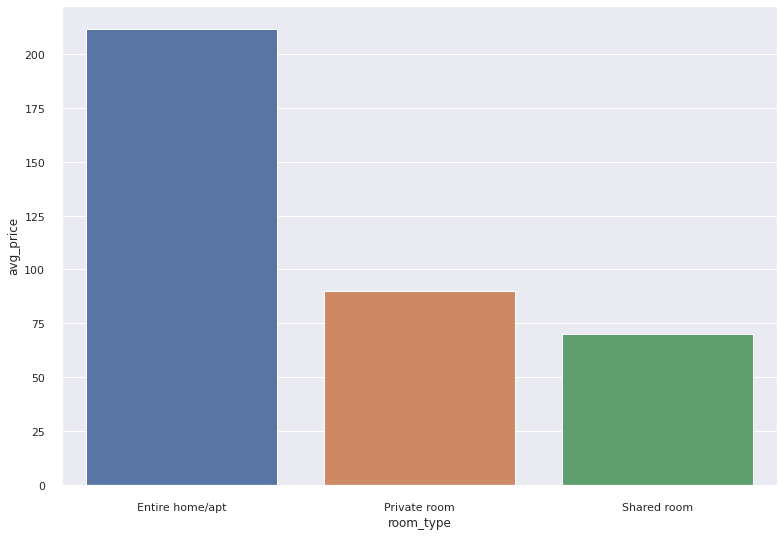

In [ ]:
# plotting of chart
sns.barplot(x = 'room_type',
            y = 'avg_price',
            data = ap)



*   For the Entire home/apt the avg. rate is approx. $ 211.

*   For the Private room the avg. rate is approx. $ 89.

*   For the Shared room the avg. rate is approx. $ 70.



In [ ]:
# avg. price for different room type in different neighbourhood group
avg_room_price = airbnb_df.groupby(['neighbourhood_group','room_type']).agg({'price':'mean'}).rename(columns={'price':'avg_price'}).reset_index()
avg_room_price

,neighbourhood_group,room_type,avg_price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


Text(0, 0.5, 'Price')

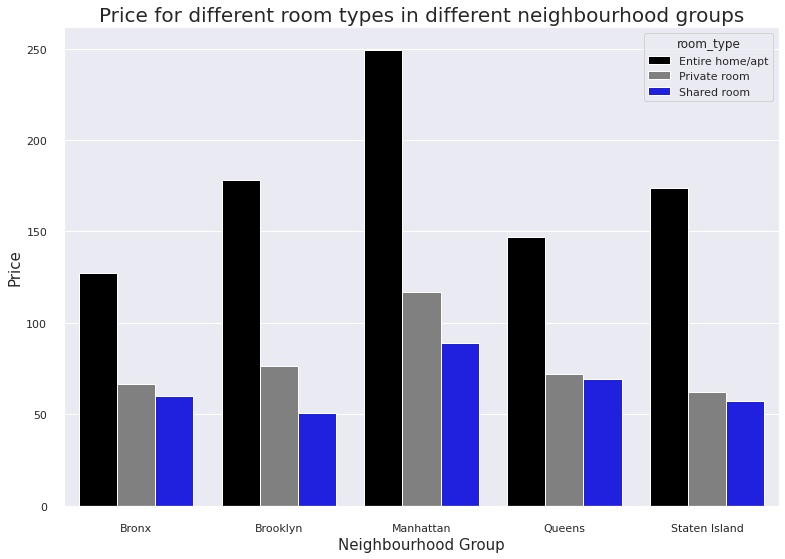

In [ ]:
# plotting the graph
sns.barplot(
    x = 'neighbourhood_group',
    y = 'avg_price',
    hue = 'room_type',
    data = avg_room_price,
    palette = ['black', 'grey', 'blue']
)
plt.title('Price for different room types in different neighbourhood groups', fontsize = 20)
plt.xlabel('Neighbourhood Group', fontsize = 15)
plt.ylabel('Price', fontsize = 15)



*   Manhattan has the highest rate for Entire room/apt and Private rooms with respect to other locations.

* Staten Island and Queens has the approx. same rates for private room and shared room.

*  Brooklyn has the lowest rate for shared room compared to others.










### Relationship between price v/s numbers of reviews ?

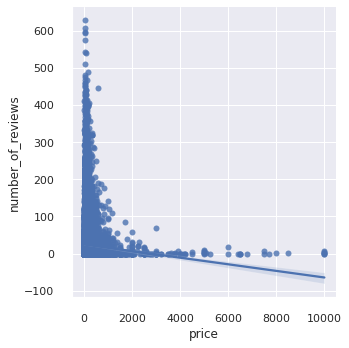

In [ ]:
sns.lmplot(x='price', y="number_of_reviews", data=airbnb_df);



*   By looking at the graph we can say that mostly people live where the price is minimum



### Which neighbourhood group has got the most reviews?





In [ ]:
# Avg. reviews with respect to their neighbourhood group
most_reviewed = airbnb_df.groupby(['neighbourhood_group'], as_index = False).agg({'number_of_reviews':'mean'}).rename(columns={'number_of_reviews':'Reviews'})
most_reviewed

,neighbourhood_group,Reviews
0,Bronx,26.004583
1,Brooklyn,24.202845
2,Manhattan,20.985596
3,Queens,27.700318
4,Staten Island,30.941019


Text(0, 0.5, '')

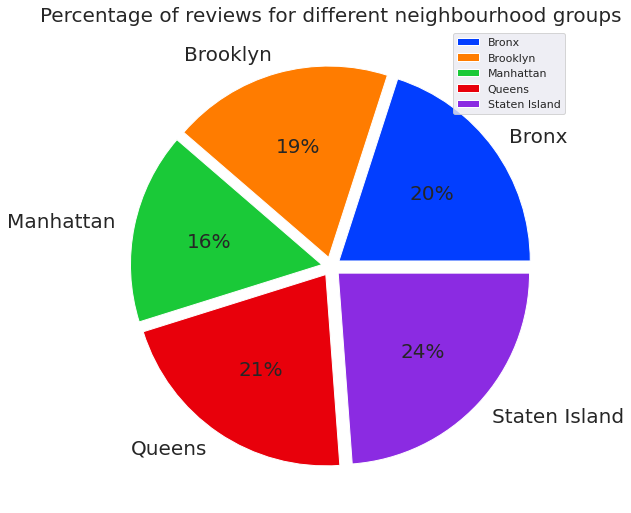

In [ ]:
# plotting the pie chart
graph = most_reviewed.plot.pie(
    y = 'Reviews',
    labels = most_reviewed['neighbourhood_group'],
    colors = sns.color_palette('bright'),
    autopct = '%.0f%%',
    explode = [0.05, 0.05, 0.05, 0.05, 0.05],
    fontsize = 20
)
graph.set_title('Percentage of reviews for different neighbourhood groups', fontsize = 20)
graph.set_ylabel('')



*  Staten island has the most numbers of reviews

*  Manhanttan has the least no. of reviews





## Which hosts are the busiest and why?

In [ ]:
# Finding the total number of nights stayed by hosts
total_nights = airbnb_df.groupby(['host_name', 'neighbourhood_group'], as_index = False).agg({'minimum_nights': 'sum'}).sort_values('minimum_nights', ascending = False).rename(columns = {'minimum_nights' : 'total_no_of_nights_stayed'})[:5]
total_nights

,host_name,neighbourhood_group,total_no_of_nights_stayed
1834,Blueground,Manhattan,7410
13221,Sonder (NYC),Manhattan,4353
7275,Kara,Manhattan,3814
9742,Michael,Manhattan,3510
6540,Jeremy & Laura,Manhattan,2880


Text(0, 0.5, 'Host name')

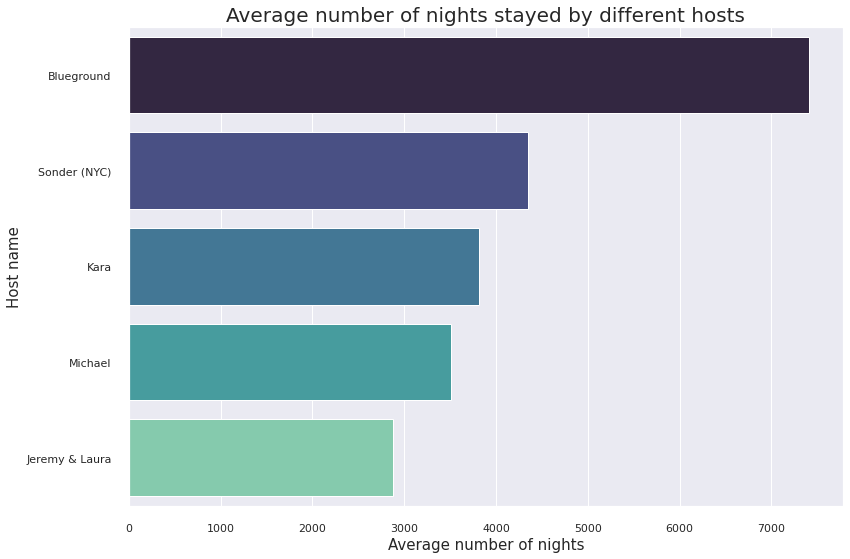

In [ ]:
# setting seaborn plotting aesthetics for creating a row chart
sns.barplot(
    y = 'host_name',
    x = 'total_no_of_nights_stayed',
    data = total_nights,
    palette = ('mako'),
    orient = 'horizontal'
)
plt.title('Average number of nights stayed by different hosts', fontsize = 20)
plt.xlabel('Average number of nights', fontsize = 15)
plt.ylabel('Host name', fontsize = 15)

Inference: <br>
Blueground has stayed the most number of nights i.e. over 7000 in Manhattan as it one of the expensive place to live in.

In [ ]:
# Finding the top 15 hosts with max no of reviews per month
host_reviews_per_month = airbnb_df.groupby('host_name').agg({'reviews_per_month': 'max'}).sort_values('reviews_per_month', ascending = False).rename(columns = {'reviews_per_month' : 'max_reviews_per_month'})[:15]
host_reviews_per_month

,max_reviews_per_month
host_name,
Row NYC,58.50
Louann,20.94
Nalicia,19.75
Danielle,16.22
Brent,15.78
Lakshmee,15.32
Dona,14.58
Alina,14.00
Sam,14.00


In [ ]:
# Finding the top 15 hosts on the basis of number of reviews
no_of_reviews_by_host = airbnb_df.groupby('host_name').agg({'number_of_reviews': 'mean'}).sort_values('number_of_reviews', ascending = False).rename(columns = {'number_of_reviews' : 'avg_no_of_reviews'})[:15]
no_of_reviews_by_host

,avg_no_of_reviews
host_name,
Dona,602.500000
Asa,488.000000
Dennis & Naoko,441.000000
Miss Dy,434.000000
Shunichi,430.000000
Gladys & Bob,414.000000
Sne,396.000000
Malini,392.000000
Amia,385.000000


In [ ]:
# taking inner join of top 15 hosts from the above two tables
merged_df = pd.merge(no_of_reviews_by_host, host_reviews_per_month, how = 'inner', on = 'host_name').sort_values('avg_no_of_reviews', ascending = False)[:5]
merged_df

,avg_no_of_reviews,max_reviews_per_month
host_name,,
Dona,602.500000,14.58
Malini,392.000000,13.15
Nalicia,348.666667,19.75


Inference: <br>
From the above analysis Dona, Malini and Nalicia have given a fairly good amount of reviews on monthly basis as well.

## Is there any noticeable difference of traffic among different areas & what could be the reason for it?

### Rooms preferred by different hosts in different neighbourhood groups

In [ ]:
# grouping neighbourhood_group according to the host_id
preferred_neighbourhood_grps = airbnb_df.groupby(['neighbourhood_group', 'room_type'], as_index = False).agg({'host_id': 'count'}).rename(columns = {'host_id' : 'number_of_hosts'})
preferred_neighbourhood_grps

,neighbourhood_group,room_type,number_of_hosts
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


Text(0, 0.5, 'Number of hosts')

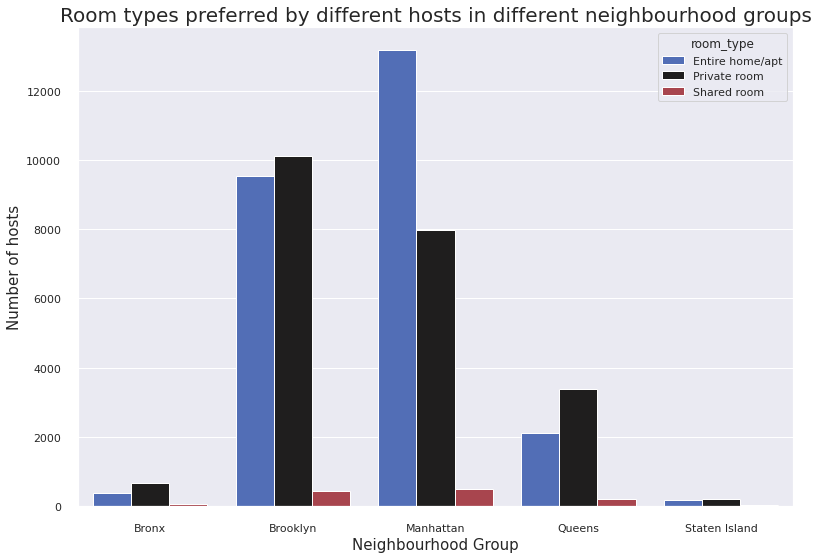

In [ ]:
# setting seaborn plotting aesthetics for creating a grouped bar chart
sns.barplot(
    x = 'neighbourhood_group',
    y = 'number_of_hosts',
    hue = 'room_type',
    data = preferred_neighbourhood_grps,
    palette = ('icefire')
)
plt.title('Room types preferred by different hosts in different neighbourhood groups', fontsize = 20)
plt.xlabel('Neighbourhood Group', fontsize = 15)
plt.ylabel('Number of hosts', fontsize = 15)
# sns.reset_defaults()

Inference: <br>


*   As we can see from the above graph entire home/apartment is mostly preferred by people in Manhatten.
*   While in Queens, hosts prefer private rooms whereas, for other places like Bronx, Brooklyn and Staten Island, the overall preference for entire home/apt and private room is the same.
*   Shared rooms are least preferred by the people.


<br>

### Conclusion:
*   People stay more nights in Manhattan in comparison to other places though it is one of the most expensive places to live.

*   Although the average price in Manhattan is the highest, people prefer to stay in those rooms whose price is low.

*   Among the 3 room types entire homes/apartments are in high demand.

*   People who like to stay in the entire home or apartment tend to stay longer.

*   Staten Island has the highest availability of rooms to other places.

*   Staten Island has got the most reviews and people stay here for the least number of nights, which means it is a tourist attraction.